# Experiment 1

In [6]:
import os

SCORES = 'final_scores'
if_dir = [f for f in os.listdir(SCORES) if f.startswith('if')]
total_size = sum(os.path.getsize(os.path.join(SCORES,f)) for f in if_dir)
print(f'IF total size: {total_size / (1024*1024):.2f} MB')

lof_dir = [f for f in os.listdir(SCORES) if f.startswith('lof')]
total_size = sum(os.path.getsize(os.path.join(SCORES,f)) for f in lof_dir)
print(f'LOF total size: {total_size / (1024*1024):.2f} MB')

mp_dir = [f for f in os.listdir(SCORES) if f.startswith('mp')]
total_size = sum(os.path.getsize(os.path.join(SCORES,f)) for f in mp_dir)
print(f'MP total size: {total_size / (1024*1024):.2f} MB')

km_dir = [f for f in os.listdir(SCORES) if f.startswith('km')]
total_size = sum(os.path.getsize(os.path.join(SCORES,f)) for f in km_dir)
print(f'KM total size: {total_size / (1024*1024):.2f} MB')
# for base_learner in BASE_LEARNERS:
#     score_dir = os.path.join(CACHED_SCORES_DIR, base_learner)
#     total_size = sum(os.path.getsize(os.path.join(score_dir, f)) for f in os.listdir(score_dir) if os.path.isfile(os.path.join(score_dir, f)))
#     print(f"{base_learner} total score file size: {total_size / (1024*1024):.2f} MB")

IF total size: 0.39 MB
LOF total size: 0.43 MB
MP total size: 0.39 MB
KM total size: 0.39 MB


In [1]:
# import numpy as np
# import pandas as pd
# from tqdm import tqdm

# from lof import LocalOutlierFactor
# from matrix_profile import MatrixProfile
# from isolation_forest import IsolationForest
# from kmeans import KMeans

# from dataloader import DataLoader
# from benchmarker import benchmark, process_precomputed_scores
# import os
# import itertools

# # Define base learners and their parameter ranges
# base_learners = {
#     'LOF': {
#         'class': LocalOutlierFactor,
#         'params': {
#             'windowSize': [25, 50, 100, 150, 200, 250], #[25, 250], #
#             'neighbors': [10, 20, 50, 100], #[50, 100], #
#             'gpu': [True]
#         }
#     },
#     'IF': {
#         'class': IsolationForest,
#         'params': {
#             'windowSize': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 350, 400, 450, 500, 550, 600]
#         }
#     },
#     'KMeans': {
#         'class': KMeans,
#         'params': {
#             'windowSize': [50, 100, 200, 500],
#             'n_clusters': [10, 20, 50, 100, 200],
#         }
#     },
#     'MP': {
#         'class': MatrixProfile,
#         'params': {
#             'windowSize': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 350, 400, 450, 500, 550, 600]
#         }
#     }
# }

# def run_experiment(base_learner_name, base_learner_class, params, ucr_path, results_path, scores_path):
#     """Run experiment for a single base learner with given parameters."""
#     learner = base_learner_class(**params)
#     benchmark_results_file = os.path.join(results_path, f"{learner.toString()}.csv")
#     # benchmark_scores_dir = os.path.join(scores_path, f"{learner.toString()}")
        
#     # Load results
#     summary = pd.read_csv(benchmark_results_file, nrows=1)
    
    
#     return {
#         'params': params,
#         'ucr_score': summary['accuracy'].values[0],
#         'computational_time': summary['total_time'].values[0],
#     }

# def generate_param_combinations(param_dict):
#     """Generate all combinations of parameters."""
#     keys = list(param_dict.keys())
#     values = list(param_dict.values())
#     for instance in itertools.product(*values):
#         yield dict(zip(keys, instance))

# # Main experiment loop
# ucr_path = 'ucrdata'
# results_path = 'final_results'
# scores_path = 'final_scores'

# all_results = []

# for base_learner_name, base_learner_info in base_learners.items():
#     print(f"Running experiments for {base_learner_name}")
#     base_learner_class = base_learner_info['class']
#     param_combinations = list(generate_param_combinations(base_learner_info['params']))
    
#     for params in tqdm(param_combinations, desc=f"{base_learner_name} configurations"):
#         result = run_experiment(base_learner_name, base_learner_class, params, ucr_path, results_path, scores_path)
#         result['base_learner'] = base_learner_name
#         all_results.append(result)

# # Convert results to DataFrame
# results_df = pd.DataFrame(all_results)

# # Analysis
# for base_learner_name in base_learners.keys():
#     learner_results = results_df[results_df['base_learner'] == base_learner_name]
    
#     print(f"\nAnalysis for {base_learner_name}:")
#     for metric in ['ucr_score', 'computational_time']:
#         mean = learner_results[metric].mean()
#         std = learner_results[metric].std()
#         cv = std / mean
#         print(f"{metric}:")
#         print(f"  Mean: {mean:.4f}")
#         print(f"  Std Dev: {std:.4f}")
#         print(f"  Coeff of Variation: {cv:.4f}")
    
#     best_config = learner_results.loc[learner_results['ucr_score'].idxmax()]
#     print(f"\nBest configuration for {base_learner_name}:")
#     print(best_config['params'])
#     print(f"UCR Score: {best_config['ucr_score']:.4f}")

# # Save full results
# experiments_path = os.path.join('final_experiments', 'experiment_e1_results.csv')
# results_df.to_csv(experiments_path, index=False)
# print(f"\nFull results saved to {experiments_path}")

# Visualisations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('final_experiments/experiment_e1_results.csv')

# Convert params column from string to dictionary
df['params'] = df['params'].apply(eval)
df

# 1. Line Plots
plt.figure(figsize=(20, 15))

for i, learner in enumerate(['LOF', 'IF', 'KMeans', 'MP'], 1):
    plt.subplot(2, 2, i)
    learner_df = df[df['base_learner'] == learner]
    
    if learner == 'LOF':
        for neighbors in learner_df['params'].apply(lambda x: x['neighbors']).unique():
            data = learner_df[learner_df['params'].apply(lambda x: x['neighbors'] == neighbors)]
            plt.plot(data['params'].apply(lambda x: x['windowSize']), data['ucr_score'], 
                     label=f'neighbors={neighbors}')
    elif learner == 'KMeans':
        for n_clusters in learner_df['params'].apply(lambda x: x['n_clusters']).unique():
            data = learner_df[learner_df['params'].apply(lambda x: x['n_clusters'] == n_clusters)]
            plt.plot(data['params'].apply(lambda x: x['windowSize']), data['ucr_score'], 
                     label=f'n_clusters={n_clusters}')
    else:  # This covers both IF and MP
        plt.plot(learner_df['params'].apply(lambda x: x['windowSize']), learner_df['ucr_score'], 
                 label=learner)
    
    plt.title(f'{learner} Performance')
    plt.xlabel('Window Size')
    plt.ylabel('UCR Score')
    plt.legend()

plt.tight_layout()
plt.savefig('final_visualisations/experiment_1/line_plots.png')
plt.close()

# 2. Scatter Plot
plt.figure(figsize=(12, 8))
for learner in df['base_learner'].unique():
    learner_df = df[df['base_learner'] == learner]
    plt.scatter(learner_df['computational_time'], learner_df['ucr_score'], label=learner, alpha=0.7)

plt.xlabel('Computational Time')
plt.ylabel('UCR Score')
plt.title('Performance vs Computational Time')
plt.legend()
plt.savefig('final_visualisations/experiment_1/scatter_plot.png')
plt.close()

# 3. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='base_learner', y='ucr_score', data=df)
plt.title('Distribution of UCR Scores by Base Learner')
plt.savefig('final_visualisations/experiment_1/box_plot.png')
plt.close()


# Bar chart of best UCR scores
plt.figure(figsize=(10, 6))
best_scores = df.groupby('base_learner')['ucr_score'].max()
best_scores.plot(kind='bar')
plt.title('Best UCR Scores by Base Learner')
plt.xlabel('Base Learner')
plt.ylabel('UCR Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('final_visualisations/experiment_1/best_ucr_scores_bar.png')
plt.close()


plt.figure(figsize=(12, 8))
markers = {'LOF': 'o', 'IF': 's', 'KMeans': '^', 'MP': 'D'}
for learner in df['base_learner'].unique():
    learner_df = df[df['base_learner'] == learner]
    plt.scatter(learner_df['computational_time'], learner_df['ucr_score'], 
                c=learner_df['ucr_score'], cmap='viridis', 
                marker=markers[learner], label=learner, alpha=0.7)

plt.xlabel('Computational Time')
plt.ylabel('UCR Score')
plt.title('Performance vs Computational Time')
plt.colorbar(label='UCR Score')
plt.legend()
plt.savefig('final_visualisations/experiment_1/scatter_plot_enhanced.png')
plt.close()

# 4. Summary Table
summary = df.groupby('base_learner').agg({
    'ucr_score': ['max', 'mean', 'std'],
    'computational_time': 'mean'
}).reset_index()

summary.columns = ['Base Learner', 'Best UCR Score', 'Mean UCR Score', 'Std UCR Score', 'Mean Computational Time']
print(summary)

# Get parameters for best score
best_params = df.loc[df.groupby('base_learner')['ucr_score'].idxmax(), ['base_learner', 'params']]
best_params.columns = ['Base Learner', 'Best Parameters']

# Merge summary and best_params
summary = summary.merge(best_params, on='Base Learner')

# Calculate best performance-time trade-off (you may want to adjust this metric)
df['trade_off'] = df['ucr_score'] / (df['computational_time']/60) #first convert computational time to min
best_trade_off = df.loc[df.groupby('base_learner')['trade_off'].idxmax(), ['base_learner', 'trade_off', 'params']]
best_trade_off.columns = ['Base Learner','Trade-off score','Best Trade-off Parameters']

# Merge summary and best_trade_off
summary = summary.merge(best_trade_off, on='Base Learner')

# Save summary to CSV
summary.to_csv('final_visualisations/experiment_1/summary_table.csv', index=False)

print("Visualizations and summary table have been created and saved.")

In [4]:
# e1_summary_table = pd.read_csv('final_visualisations/experiment_1/summary_table.csv')
# e1_summary_table

In [5]:
from ensemble_detector import EnsembleDetector
from lof import LocalOutlierFactor
from matrix_profile import MatrixProfile
from benchmarker import benchmark

base_learner_configs = {
    'LOF': {
        'class': LocalOutlierFactor,
        'params': [
            {'windowSize': ws, 'neighbors': n, 'gpu': True}
            for ws in [25, 50, 100, 150, 200]
            for n in [10, 20, 50, 100]
        ]
    },
    'MP': {
        'class': MatrixProfile,
        'params': [
            {'windowSize': ws}
            for ws in [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700]
        ]
    }
}

###########################################
# ONLY SELECT BASE LEARNERS WITH AN ACCURACY OVER 50 PERCENT
###########################################

def create_pairwise_ensemble(base_learner_type1, base_learner_type2):
    base_learner_instances = []
    selected_params = []
    
    for params in base_learner_configs[base_learner_type1]['params']:
        base_learner_instances.append(base_learner_configs[base_learner_type1]['class'](**params))
        selected_params.append((base_learner_type1, params))
    
    for params in base_learner_configs[base_learner_type2]['params']:
        base_learner_instances.append(base_learner_configs[base_learner_type2]['class'](**params))
        selected_params.append((base_learner_type2, params))
    
    return base_learner_instances, selected_params

base_learner_instances, selected_params = create_pairwise_ensemble('LOF', 'MP')

detector = EnsembleDetector(base_learner_instances )
ucr_path = 'ucrdata'
benchmark_results_file = 'demo/lof_mp_soft_vote.csv'
benchmark_scores_dir = 'demo/lof_mp_soft_vote'
benchmark(detector, ucr_path, benchmark_results_file, benchmark_scores_dir)


CUDA is not available. Running on CPU.


Benchmarking: 100%|██████████| 250/250 [03:50<00:00,  1.09it/s]

Benchmark complete for ensemble_het_lof_mp_simple_average:
Total time: 3893.58 seconds
Accuracy: 67.20%
Correct predictions: 168
Incorrect predictions: 82
Failed predictions: 0
Results saved to: demo/lof_mp_soft_vote.csv
Scores saved to: demo/lof_mp_soft_vote


In [ ]:
# import os
# import csv
# import json

# def extract_lof_results(directory):
#     results = []
#     for filename in os.listdir(directory):
#         if filename.startswith('lof_') and filename.endswith('.csv'):
#             filepath = os.path.join(directory, filename)
#             with open(filepath, 'r') as f:
#                 reader = csv.reader(f)
#                 header = next(reader)  # Skip the header row
#                 first_row = next(reader)  # Get the first data row
#                 # Extract parameters from filename
#                 params = extract_params_from_filename(filename)
#                 ucr_score = float(first_row[2])  # accuracy is in the 3rd column (index 2)
#                 computational_time = float(first_row[1])  # total_time is in the 2nd column (index 1)
#                 results.append({
#                     'params': params,
#                     'ucr_score': ucr_score,
#                     'computational_time': computational_time,
#                     'base_learner': 'LOF'
#                 })
#     return results

# def extract_params_from_filename(filename):
#     # Extract windowSize and neighbors from filename like 'lof_w25_n10.csv'
#     parts = filename.split('_')
#     windowSize = int(parts[1][1:])  # Remove 'w' and convert to int
#     neighbors = int(parts[2][1:-4])  # Remove 'n' and '.csv', then convert to int
#     return {'windowSize': windowSize, 'neighbors': neighbors, 'gpu': True}

# def write_to_csv(results, output_file):
#     with open(output_file, 'a', newline='') as f:  # 'a' for append mode
#         writer = csv.writer(f)
#         for result in results:
#             writer.writerow([
#                 json.dumps(result['params']),
#                 result['ucr_score'],
#                 result['computational_time'],
#                 result['base_learner']
#             ])

# # Directory containing the individual LOF result files
# lof_results_directory = 'final_results'

# # Output file (existing experiment_e1_results.csv)
# output_file = 'test.csv'

# # Extract LOF results
# lof_results = extract_lof_results(lof_results_directory)

# # Append LOF results to the existing CSV file
# write_to_csv(lof_results, output_file)

# print(f"LOF results have been appended to {output_file}")

LOF results have been appended to test.csv


# Results


1. Overall Performance Comparison:
   From the box plot (Image 3) and summary table (Image 4), we can see that:
   - LOF (Local Outlier Factor) performs best overall, with the highest median UCR score and best UCR score (0.620).
   - MP (Matrix Profile) shows high variability in performance, with some configurations performing very well.
   - KMeans performs moderately well, with less variability than MP.
   - IF (Isolation Forest) consistently performs the worst among the four algorithms.

2. Performance vs Computational Time (Image 1):
   - LOF shows the best performance but also has the highest computational time.
   - IF is the fastest but performs poorly.
   - MP and KMeans offer a balance between performance and speed.
   - There is no general trend of improved performance with increased computational time, further suggesting hyperperameter configurations to be a key decision

3. Impact of Window Size and Other Parameters (Image 2):
   
   a) LOF:
      - Performance peaks at window size 50-100 for all neighbor configurations.
      - More neighbors generally lead to better performance, with 50 neighbors performing best.
   
   b) IF:
      - Performance is relatively stable across window sizes, with a slight peak around 100-200.
   
   c) KMeans:
      - Smaller window sizes generally perform better.
      - More clusters tend to improve performance, with 100 clusters performing best.
   
   d) MP:
      - Performance peaks at window size around 140-160.
      - Shows high sensitivity to window size.

4. Best Configurations (Image 4):
   - LOF: Window size 50, 50 neighbors, GPU=True (UCR Score: 0.620)
   - KMeans: Window size 50, 100 clusters (UCR Score: 0.516)
   - MP: Window size 140 (UCR Score: 0.576)
   - IF: Window size 100 (UCR Score: 0.232)

5. Trade-offs:
   - LOF offers the best performance but at the highest computational cost.
   - IF is the fastest but performs poorly, making it less suitable as a standalone algorithm.
   - MP and KMeans offer good balance between performance and speed, with MP showing higher variability.

6. Variability in Performance:
   - MP shows the highest standard deviation in UCR scores (0.147144), indicating high sensitivity to parameter settings.
   - LOF and KMeans show moderate variability.
   - IF shows the least variability but consistently poor performance.

Conclusions and Recommendations:
1. LOF is the most promising algorithm for high accuracy, but its computational cost may be a limitation for large-scale applications.
2. MP offers good performance with moderate computational cost and could be valuable in an ensemble.
3. KMeans provides consistent, moderate performance and could be a reliable component in an ensemble.
4. IF, despite its poor standalone performance, might still contribute in an ensemble due to its speed and different approach to anomaly detection.
5. For the ensemble model, consider:
   - Using LOF with window size 50 and 50 neighbors as a core component.
   - Incorporating MP with window size around 140 for its high-performance potential.
   - Including KMeans with window size 50 and 100 clusters for consistent performance.
   - Potentially using IF with window size 100 for diversity, despite its lower individual performance.

These findings provide a strong foundation for designing an effective ensemble model in subsequent experiments, leveraging the strengths of each algorithm while mitigating their individual weaknesses.

In [ ]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import itertools
import os
import json

# from lof import LocalOutlierFactor
# from matrix_profile import MatrixProfile
# from isolation_forest import IsolationForest
# from kmeans import KMeans
# from ensemble_detector import EnsembleDetector
# from dataloader import DataLoader
# from benchmarker import benchmark

# # Constants
# UCR_PATH = 'ucrdata'
# RESULTS_PATH = 'results'
# SCORES_PATH = 'scores'
# ENSEMBLE_RESULTS_DIR = 'test/ensembles/results'
# ENSEMBLE_SCORES_DIR = 'test/ensembles/scores'

# # Define base learners and their parameter ranges
# base_learner_configs = {
#     'LOF': {
#         'class': LocalOutlierFactor,
#         'params': [
#             {'windowSize': ws, 'neighbors': n, 'gpu': True}
#             for ws in [25, 50, 100, 150, 200, 250]
#             for n in [10, 20, 50, 100]
#         ]
#     },
#     'IF': {
#         'class': IsolationForest,
#         'params': [
#             {'windowSize': ws}
#             for ws in [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 350, 400, 450, 500, 550, 600]
#         ]
#     },
#     'KMeans': {
#         'class': KMeans,
#         'params': [
#             {'windowSize': ws, 'n_clusters': nc}
#             for ws in [50, 100, 200, 500]
#             for nc in [10, 20, 50, 100, 200]
#         ]
#     },
#     'MP': {
#         'class': MatrixProfile,
#         'params': [
#             {'windowSize': ws}
#             for ws in [20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 250, 300, 350, 400, 450, 500, 550, 600]
#         ]
#     }
# }

# # Ensemble methods
# ENSEMBLE_METHODS = [
#     ('simple_average', {}),
#     # ('maximum_score', {}),
#     ('wv_ols', {}),
#     # ('wv_ols_r2', {'emphasize_diversity': False}),
#     # ('wv_ols_r2', {'emphasize_diversity': True}),
#     ('hard_voting', {'spread_window': 100, 'gaussian': False}),
#     # ('hard_voting', {'spread_window': 100, 'gaussian': True})
# ]

# def create_pairwise_ensemble(base_learner_type1, base_learner_type2):
#     base_learner_instances = []
#     selected_params = []
    
#     for params in base_learner_configs[base_learner_type1]['params']:
#         base_learner_instances.append(base_learner_configs[base_learner_type1]['class'](**params))
#         selected_params.append((base_learner_type1, params))
    
#     for params in base_learner_configs[base_learner_type2]['params']:
#         base_learner_instances.append(base_learner_configs[base_learner_type2]['class'](**params))
#         selected_params.append((base_learner_type2, params))
    
#     return base_learner_instances, selected_params

# def run_experiment():
#     results = []
#     configurations = []
    
#     base_learner_pairs = list(itertools.combinations(base_learner_configs.keys(), 2))
    
#     for pair in tqdm(base_learner_pairs, desc="Running pairwise ensembles"):
#         base_learner_instances, selected_params = create_pairwise_ensemble(pair[0], pair[1])
        
#         for method, method_params in ENSEMBLE_METHODS:
#             ensemble = EnsembleDetector(
#                 base_learners=base_learner_instances,
#                 method=method,
#                 method_params=method_params,
#                 scores_dir=SCORES_PATH
#             )
            
#             ensemble_name = f"ensemble_{pair[0]}_{pair[1]}_{ensemble.toString()}"
#             save_results_file = os.path.join(ENSEMBLE_RESULTS_DIR, f"{ensemble_name}.csv")
#             save_scores_dir = os.path.join(ENSEMBLE_SCORES_DIR, ensemble_name)
            
#             benchmark(ensemble, UCR_PATH, save_results_file, save_scores_dir)
            
#             benchmark_results = pd.read_csv(save_results_file, nrows=1)
            
#             result = {
#                 'base_learner_pair': f"{pair[0]}_{pair[1]}",
#                 'ensemble_method': method,
#                 'method_params': json.dumps(method_params),
#                 'ucr_score': benchmark_results['accuracy'].values[0],
#                 'computational_time': benchmark_results['total_time'].values[0]
#             }
#             results.append(result)
            
#             configuration = {
#                 'base_learner_pair': f"{pair[0]}_{pair[1]}",
#                 'ensemble_method': method,
#                 'method_params': method_params,
#                 'base_learner_params': selected_params
#             }
#             configurations.append(configuration)
    
#     return pd.DataFrame(results), configurations

# # Ensure directories exist
# os.makedirs(ENSEMBLE_RESULTS_DIR, exist_ok=True)
# os.makedirs(ENSEMBLE_SCORES_DIR, exist_ok=True)

# # Run the experiment
# results_df, configurations = run_experiment()

# # Save results
# results_df.to_csv('test/experiments/experiment_e1b_results.csv', index=False)

# # Save configurations
# with open('test/experiments/experiment_e1b_configurations.json', 'w') as f:
#     json.dump(configurations, f, indent=2)

# print("Experiment E1b completed. Results saved to 'test/experiments/experiment_e1b_results.csv' and 'test/experiments/experiment_e1b_configurations.json'.")

In [ ]:
results_df = pd.read_csv('test/experiments/experiment_e1b_results.csv')
sorted_results = results_df.sort_values(by='ucr_score', ascending=False)
sorted_results

,base_learner_pair,ensemble_method,method_params,ucr_score,computational_time
6,LOF_MP,simple_average,{},0.672,4464.166762
8,LOF_MP,hard_voting,"{""spread_window"": 100, ""gaussian"": false}",0.668,4467.187228
4,LOF_KMeans,wv_ols,{},0.628,7465.018346
1,LOF_IF,wv_ols,{},0.628,5239.017497
7,LOF_MP,wv_ols,{},0.624,5237.060833
3,LOF_KMeans,simple_average,{},0.624,6609.706449
5,LOF_KMeans,hard_voting,"{""spread_window"": 100, ""gaussian"": false}",0.612,6612.661585
15,KMeans_MP,simple_average,{},0.560,5228.911249
2,LOF_IF,hard_voting,"{""spread_window"": 100, ""gaussian"": false}",0.552,4467.275310
0,LOF_IF,simple_average,{},0.540,4464.245529


Columns in all_results: Index(['ts_name', 'status', 'predicted_anomaly', 'anomaly_start',
       'anomaly_end', 'processing_time', 'model', 'overall_accuracy'],
      dtype='object')
Columns in annotations: Index(['timeseries', 'anomaly_type'], dtype='object')


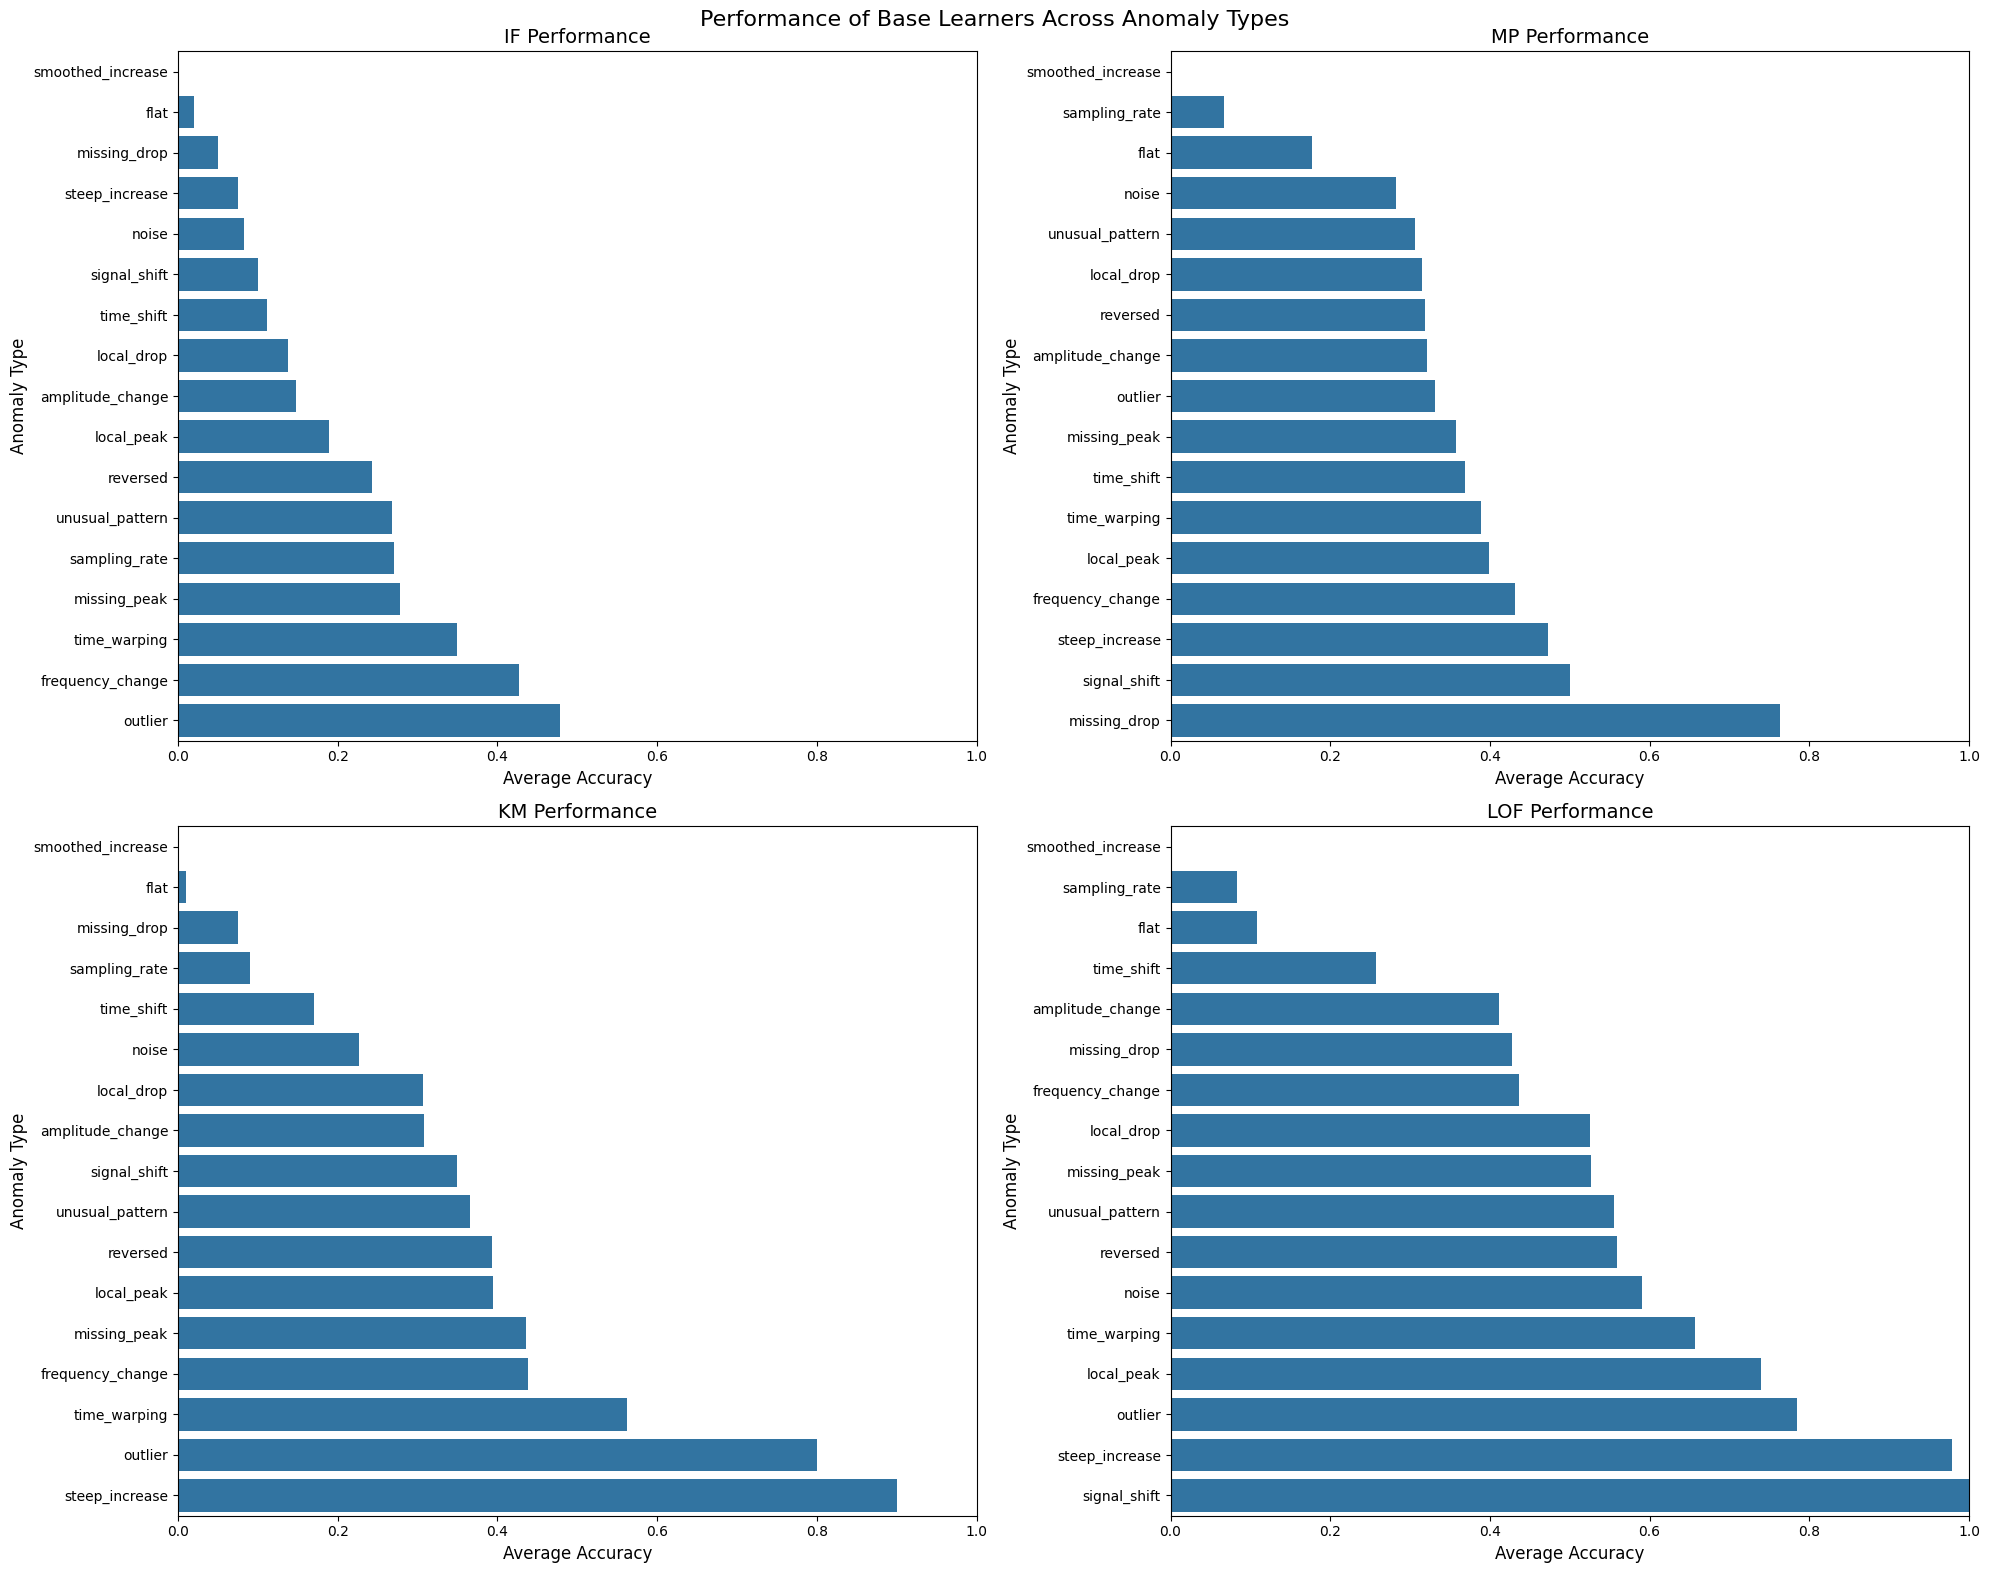

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load annotations
annotations = pd.read_csv('appendices/annotations.csv')
# Remove '.csv' from the timeseries column to match the results files
annotations['timeseries'] = annotations['timeseries'].str.replace('.csv', '')

def load_results(model_class):
    results = []
    for file in os.listdir('results'):
        if file.startswith(model_class) and file.endswith('.csv'):
            with open(os.path.join('results', file), 'r') as f:
                # Read header
                header = f.readline().strip().split(',')
                values = f.readline().strip().split(',')
                algorithm_info = dict(zip(header, values))
                
                # Skip '###' line
                f.readline()
                
                # Read the rest as CSV
                df = pd.read_csv(f)
            
            df['model'] = algorithm_info['algorithm_name']
            df['overall_accuracy'] = float(algorithm_info['accuracy'])
            results.append(df)
    
    return pd.concat(results, ignore_index=True) if results else pd.DataFrame()

# Load results for each model class
model_classes = ['if', 'mp', 'km', 'lof']
all_results = pd.concat([load_results(mc) for mc in model_classes], ignore_index=True)

print("Columns in all_results:", all_results.columns)
print("Columns in annotations:", annotations.columns)

# Merge results with annotations
merged_data = pd.merge(all_results, annotations, left_on='ts_name', right_on='timeseries')

# Calculate average accuracy for each model class and anomaly type
performance = merged_data.groupby(['model', 'anomaly_type'])['status'].apply(lambda x: (x == 'correct').mean()).reset_index()
performance.columns = ['model', 'anomaly_type', 'accuracy']

# Create 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Performance of Base Learners Across Anomaly Types', fontsize=16)

for i, mc in enumerate(model_classes):
    ax = axs[i//2, i%2]
    data = performance[performance['model'].str.startswith(mc)].groupby('anomaly_type')['accuracy'].mean().sort_values(ascending=True)
    
    sns.barplot(x=data.values, y=data.index, ax=ax)
    ax.set_title(f'{mc.upper()} Performance', fontsize=14)
    ax.set_xlabel('Average Accuracy', fontsize=12)
    ax.set_ylabel('Anomaly Type', fontsize=12)
    ax.set_xlim(0, 1)  # Set x-axis limit from 0 to 1 for accuracy

plt.tight_layout()
plt.savefig('visualisations/base_learner_performance_by_anomaly_type.png', dpi=300, bbox_inches='tight')
plt.show()